# Assignment 3-Simple Linear Regression-2

In [1]:
#import libraries
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
def min_max_skew(series):
    cmin = np.around(np.min(series), 2)
    cmax = np.around(np.max(series), 2)
    skew = np.around(stats.skew(series), 2)
    
    return cmin, cmax, skew

In [3]:
def transform_skew(series):
    # Given Series
    series_min, series_max, series_skew = min_max_skew(series)
    
    # Log transformation
    log_series = np.log(series)
    log_min, log_max, log_skew = min_max_skew(log_series)
    
    # Square root transformation
    root_series = np.sqrt(series)
    root_min, root_max, root_skew = min_max_skew(root_series)
    
    # Reciprocal transformation
    reciprocal_series = 1 / series
    reciprocal_min, reciprocal_max, reciprocal_skew = min_max_skew(reciprocal_series)
    
    # Box-Cox transformation
    boxcox_series = stats.boxcox(series)[0]
    boxcox_min, boxcox_max, boxcox_skew = min_max_skew(boxcox_series)
    
    # Building Min, Max and Transformed values DataFrame
    df_min_max_skew = pd.DataFrame({
        'Tranformation': ['Given Series', 'Log', 'Square root', 'Reciprocal', 'Box-Cox'],
        'Min': [series_min, log_min, root_min, reciprocal_min, boxcox_min],
        'Max': [series_max, log_max, root_max, reciprocal_max, boxcox_max],
        'Skew': [series_skew, log_skew, root_skew, reciprocal_skew, boxcox_skew]
    })
    
    return df_min_max_skew

In [33]:
#import dataset
dataset=pd.read_csv("C:/Users/dell/Downloads/Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# EDA

In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Calculating skewness of all variables
dataset.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

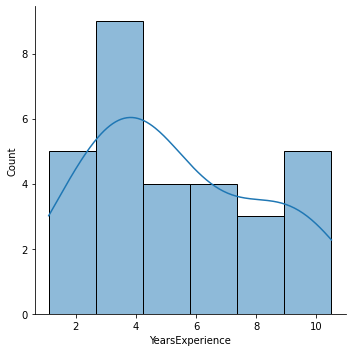

In [35]:
sns.displot(dataset['YearsExperience'], kde=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

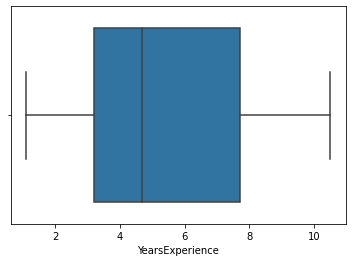

In [8]:
sns.boxplot(dataset['YearsExperience'])

In [9]:
# Performing different transformations
transform_skew(dataset['YearsExperience'])

,Tranformation,Min,Max,Skew
0,Given Series,1.10,10.50,0.36
1,Log,0.10,2.35,-0.57
2,Square root,1.05,3.24,-0.05
3,Reciprocal,0.10,0.91,1.74
4,Box-Cox,0.10,4.21,-0.09


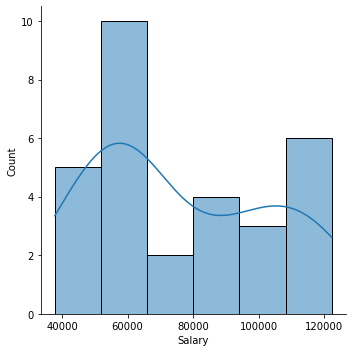

In [37]:
sns.displot(dataset['Salary'], kde=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

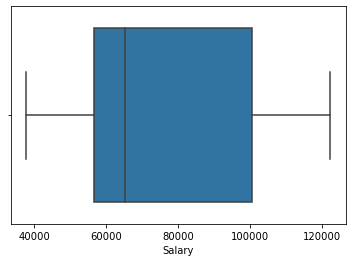

In [38]:
sns.boxplot(dataset['Salary'])

In [39]:
# Performing different transformations
transform_skew(dataset['Salary'])

,Tranformation,Min,Max,Skew
0,Given Series,37731.00,122391.00,0.34
1,Log,10.54,11.71,-0.04
2,Square root,194.24,349.84,0.16
3,Reciprocal,0.00,0.00,0.52
4,Box-Cox,15.85,18.49,-0.01


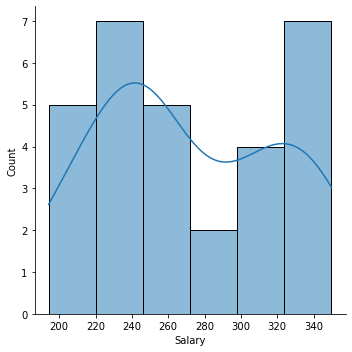

In [40]:
# Plotting the histogram after square root transformation
sns.displot(np.sqrt(dataset['Salary']), kde=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

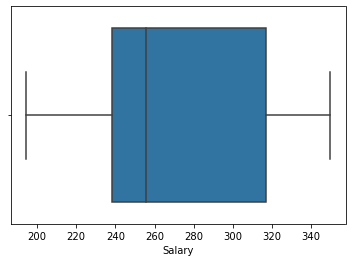

In [41]:
sns.boxplot(np.sqrt(dataset['Salary']))

In [42]:
# Transforming and storing Salary variable in a new column
dataset['Salary_transformed'] = np.sqrt(dataset['Salary'])

In [43]:
# Deleting Salary column
dataset = dataset.drop(columns=['Salary'])

In [44]:
dataset.skew()

YearsExperience       0.379560
Salary_transformed    0.169043
dtype: float64

In [45]:
dataset.head()

,YearsExperience,Salary_transformed
0,1.1,198.350700
1,1.3,214.953483
2,1.5,194.244691
3,2.0,208.626460
4,2.2,199.727314


In [46]:
#Correlation
dataset.corr()

,YearsExperience,Salary_transformed
YearsExperience,1.000000,0.974595
Salary_transformed,0.974595,1.000000


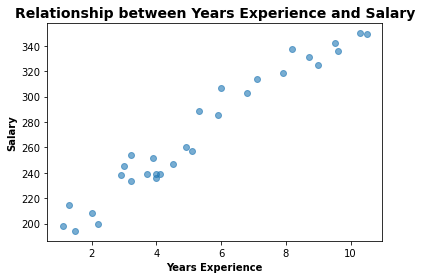

In [47]:
# Scatter plot between Years experience and Salary
plt.figure(figsize=(6,4))
plt.scatter(dataset['YearsExperience'],
            dataset['Salary_transformed'],
            alpha=0.6)
plt.title('Relationship between Years Experience and Salary', fontsize=14, weight='bold')
plt.xlabel('Years Experience', weight='bold')
plt.ylabel('Salary', weight='bold')
plt.show()

# Simple Linear Regression

In [49]:
#Model Building
model=smf.ols('Salary_transformed~YearsExperience',data=dataset).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary_transformed'>

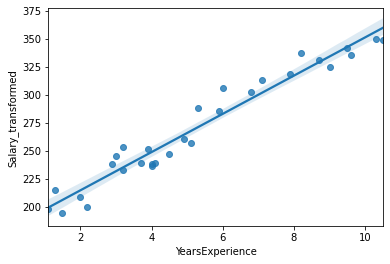

In [50]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary_transformed'])

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Salary_transformed   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           9.78e-20
Time:                        00:33:43   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Model Prediction
new_data=pd.Series([4,6])
new_data

0    4
1    6
dtype: int64

In [56]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,4
1,6


In [57]:
model.predict(data_pred)

0    248.926350
1    283.039414
dtype: float64